# 3- Modelos Geocêntricos


## Distribuição Normal

<img src="./images/Gauss.jpg" alt="gauss" />


fonte: [wikipedia](https://pt.wikipedia.org/wiki/Marco_alem%C3%A3o)


fonte: [Distribuição Gausiana](https://www.bis-ans-ende-der-welt.net/Deutschland-B.htm)

### Regressão Linear

São simples *golems* estatísticos.


- Modelo de média e variância normalmente (Gaussiano) distribuído.


- Média como uma combinação aditiva dos pesos das varáveis que a compõem.


- Variância é constante.

### Gerando um processo de flutuação normal

Através da flutuação normal *(sobe 1 ou desce 1)* iremos construir um processo que tenha como resultante natural o surgimento de um comportamento cuja distribuição podemos descrever como a normal.  

In [1]:
# Necessário para desbloquear o asyncio no Jupyter

# Fonte: https://pystan.readthedocs.io/en/latest/faq.html
# Fonte: https://github.com/microsoft/playwright-python/issues/178

# Docs Pystan: https://pystan.readthedocs.io/en/latest/index.html

# -------------
# Instalar nest_asyncio: pip install nest_asyncio - Estára no requirements.txt
# Versões 
# python==3.8.0
# numpy==1.21.1
# pystan==3.2.0
# nest_asyncio==1.5.1
# -------------

# Rodar esse comando antes de import a stan (pystan versão 3.x)
import nest_asyncio
nest_asyncio.apply()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

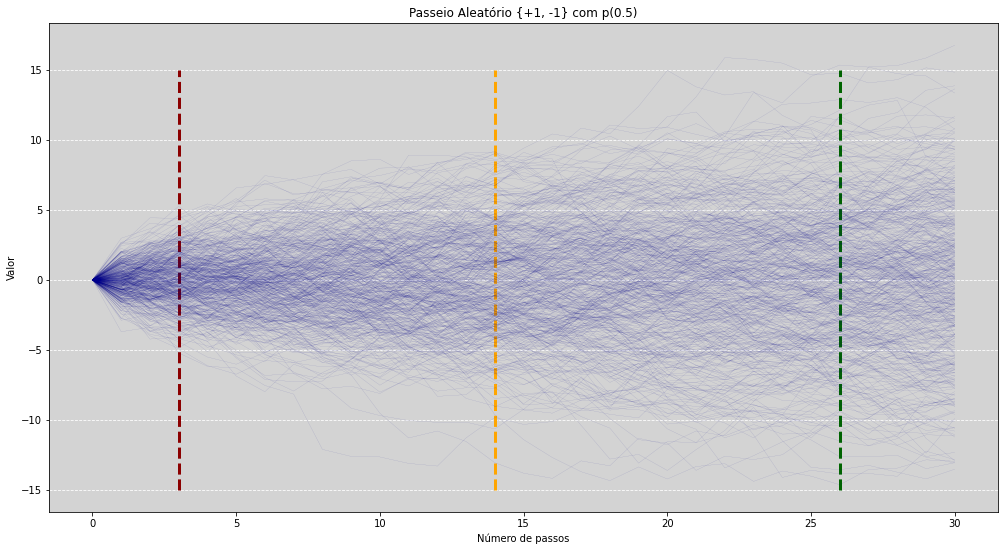

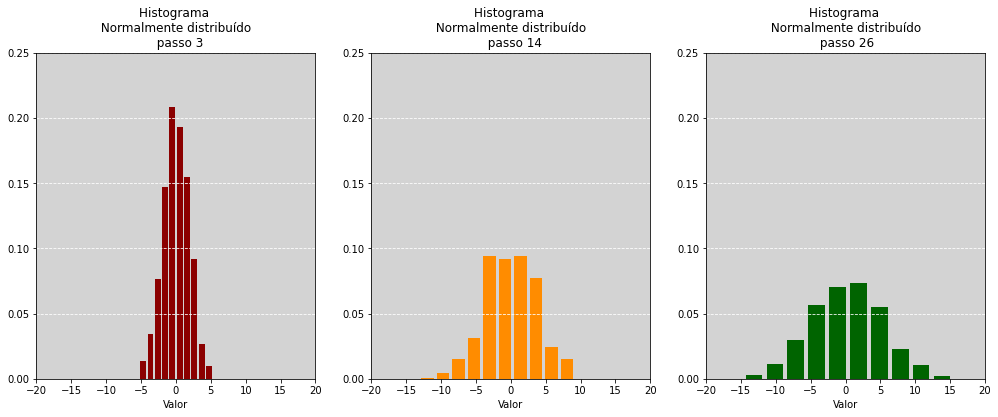

In [20]:
# Construindo um passeio conforme a distribuição Bernoulli(0.5) em +1 ou -1
n_linhas = 500  # Quantas linhas iremos simular
n_passos = 30   # Quantidade de passos que iremos simular

corte_1 = 3   # Indica o primeiro corte no passeio
corte_2 = 14  # Indica o segundo corte no passeio
corte_3 = 26  # Indica o terceiro corte no passeio


aleatorizar_grafico = True  # True para ver a simulação um pouco mais aleatorizada visualmente. False para ver sem efeito.

passeios = []  # Armazenar todos os passeios gerados num array

# Parâmetros da simulação
plt.figure(figsize=(17, 9))
plt.rcParams['axes.facecolor'] = 'lightgray'  # Alterando a cor de fundo, para ficar mais elegante. 

for linha in range(n_linhas):  # Quantas linhas iremos plotar
    
    passeio = [0]  # Inicializando todos os pontos com o valor 0 (conforme dito acima!)
    novo_ponto = 0  # variável de controle 
    
    for passo in range(n_passos):  # Quantos passos iremos simular?
        
        if aleatorizar_grafico:
            # +1 (subida) ou -1 (descida) - Com efeito de aleatorizacão (apenas para melhorar a visualização).
            novo_ponto = novo_ponto + np.random.choice([1, -1]) * np.random.normal(0, 1) 
        else:    
            # +1 (subida) ou -1 (descida) - Sem efeito de aleatorizacão - "Pixelizado"
            novo_ponto = novo_ponto + np.random.choice([1, -1]) 
        
        passeio.append(novo_ponto)
    
    passeios.append(passeio)  # Armazendo todas as linhas geradas
    plt.plot(passeios[linha], color='darkblue', alpha=0.5, linewidth=0.1)  # Plotando a linha gerada
    
# Retas horizontais dos cortes
plt.vlines(corte_1, -15, 15, color='darkred', ls='--',  linewidth=3)
plt.vlines(corte_2, -15, 15, color='orange', ls='--', linewidth=3)
plt.vlines(corte_3, -15, 15, color='darkgreen', ls='--', linewidth=3)

# Configurando infos do gráfico    
plt.title("Passeio Aleatório {+1, -1} com p(0.5)")
plt.xlabel('Número de passos')
plt.ylabel('Valor')

plt.grid(axis='y', ls='--', color='white')

plt.show()


passeios = np.array(passeios).T  # Transpondo os vetores de passeios para ajuste na plotagem.

# ------------
# Gerando os histogramas de todas as linhas para alguns passos específicos ao longo do passeio.
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(17, 6))

ax1.hist(passeios[corte_1], color='darkred', rwidth=0.8, density=True)
ax1.grid(axis='y', ls='--', color='white')
ax1.set_title("Histograma \n Normalmente distribuído \n  passo " + str(corte_1))
ax1.set_xlabel('Valor')
ax1.set_xlim(-20, 20)
ax1.set_ylim(0, 0.25)

ax2.hist(passeios[corte_2], color='darkorange', rwidth=0.8, density=True)
ax2.grid(axis='y', ls='--', color='white')
ax2.set_title("Histograma \n Normalmente distribuído \n  passo " + str(corte_2))
ax2.set_xlabel('Valor')
ax2.set_xlim(-20, 20)
ax2.set_ylim(0, 0.25)

ax3.hist(passeios[corte_3], color='darkgreen', rwidth=0.8, density=True)
ax3.grid(axis='y', ls='--', color='white')
ax3.set_title("Histograma \n Normalmente distribuído \n passo " + str(corte_3))
ax3.set_xlabel('Valor')
ax3.set_xlim(-20, 20)      
ax3.set_ylim(0, 0.25)
    
plt.show()



Todas as flutuações geradas se equilibriam entre si, gerando assim uma curva simétrica. Porém cada uma delas individualmente, e não necessariamente, se equilibram entre si. Isso é a $Normal$! 

### Porque a Normal?


O interessante, e frustrante ao mesmo tempo, é que mesmos nós sabendo como cada uma das curvas são geradas, não temos acesso a `como cada uma delas individualmente faz o seu percurso`, pois temos muito pouca informação sobre como é o processo gerador dessas curvas.


Assim, quando vimos um comportamento de um evento que é normalmente distribuído, por exemplo, não sabemos o que tem la dentro! Não temos um acesso intuitivo da informação contida no comportamento individual de cada passeio.


Mas sabendo que o processo como um todo tem o comportamento, aproximadamente, normalmente distribuído, podemos usar essa informação para falsificar ou não hipóteses de um estudo particular.


$$ x \sim normal(\mu, \sigma) $$



E isso é muito legal, pois podemos descrever o processo como um todo, com apenas por dois números, pois toda a informação do funcionamento da maquinaria subjacente do processo foi eliminada. E tudo que foi preservado foi a média ($\mu$) e o desvio padrão ($\sigma$), por isso que precisamos apenas desses dois números para descrever uma distribuição normal.


```{note}
Essa é toda a informação que conseguimos extrair da maquinaria subjacente, a Natureza!
```


O mais terrível é que não podemos saber o funcionamento do processo a partir de um simples histograma! Temos que realmente fazer ciência para isso, temos de *cavar mais fundo*, *medir coisas mais difíceis* para `só assim` descobrir mais algumas coisas nas profundezas do mecanismo de geração do processo.


Isso é verdade não apenas para a $Normal$, mas para muitas outras distribuições! Todas as distribuições de máxima entropia tem essa mesma propriedade, que muitos processos diferentes possuem a mesma distribuição de frequências.


### Perspectiva Ontológica

Ontologia é o ramo da filosofia que `estuda a natureza do ser`, da existência e da própria realidade. Vamos observar a distribuição $Normal$ sobre uma perspectiva ontológia:


- Processo que adiciona flutuações amortecidas como resultado.


- As flutuações amortecidas se aproximam de uma gaussiana.


- Mas nenhuma informação sobrou do processo gerador, apenas a média e a variância.


- Não podemos inferir o processo a partir dessa distribuição.


Se quisermos construir um modelo visando responder de modo mais conservador possível, no qual tudo que estiver disposto a dizer sobre algum conjunto de medidas, como medida de alturas, é que eles têm variância finita e podemos usar a distribuição gaussiana. 

Mesmo se eles forem distorcidos ou alguma outras coisas, a distribuição gaussiana cobrirá uma faixa mais ampla de valores do que qualquer outra com a mesma média e a mesma variância! 

Essa é a distribuição mais é conservadora que podemos assumir. Qualquer outra distribuição será mais restrita por isso terá mais informação incorporada, por isso a opção mais conservadora que podemos propor é a `gaussiana`, no qual tudo que precisamos para ela é a média a variância. (*Isso será demostrado mais para frente no curso*.)


### Perspectiva Epistemologica

Epistemologia, também conhecida como a Teoria do Conhecimento, é o ramo da filosofia que estuda como o ser humano ou a própria ciência adquire e justifica seus conhecimentos. Vamos observar a $Normal$ sobre essa perspectiva:


- Conhecemos apenas a média e a variância.


- A menos surpreendente e mais conservadora (*máxima entropia*) distribuição gaussiana.


- É a distribuição natural da máxima entropia.


### Modelos Lineares

"**Modelo lineares generalizados**": teste *t*, regressão simples, regressão multipla, ANOVA, ANCOVA, MANOVA, MANCOVA, etc, etc, etc. Todos esses modelos `são a mesma coisa, são todos modelos os lineares`.

A seguir, iremos construir modelos lineares manualmente e do zero para entendermos como é o processo de pensamento de construção de hipóteses e, também, iremos construir um gráfico no qual iremos visualizar a nossa incerteza do sistema.

```{warning}
Iremos aprender estratégias e não procedimentos!
```

#### Acordando a linguagem que iremos trabalhar

Relembrando o primeiro modelo que nós fizemos anteriormente, o lançamento do globo, nós tinhamos:

$$ w \sim Binomial(N, p) $$

$$ p \sim Uniform(0, 1) $$



- $w$: Resultado



- $\sim$: "*É distribuído como...*" 



- $Binomial( N, p)$: É a função de distribuição de probabilidade dos dados (verossimilhança, ou *likelihood* no inglês)



- $p$: É o parâmetro que iremos estimar



- $Uniform(0, 1)$: Nossa distribuição *à priori*




 No exemplo do lançamento do globo, o que estávamos interessados em saber era a proporção de água na superfície ($p$) da Terra. O processo que usamos para coletar os dados, a amostragem, automaticamente nos propõem, de modo quase impositivo, a utilização da estrutura Binomial.
 
A estrutura que distribui os dados binominalmente, nada mais é do que a contagem do número de vezes que é possível acontecer tal fato, dado que a proporção $p$ é fixa para todas às vezes $N$ que iremos retirar uma amostra. 

----

Essa é a linguagem que iremos usar nesse curso. A notação matemática padrão, na qual consiste em uma maneira de comunicar a todos os nossos colegas de trabalho o que foi pensado, quais foram as suposições, quais foram as hipóteses (isto é, as sugestões) e, também, qual a estrutura foi proposta para um possível caminho para se entender o problema. 

```{note}
A linguagem matemática será a forma de comunicar ao mundo sua forma de pensar!
```

### Linguagem da modelagem

Do mesmo modo que escrevemos o modelo acima iremos escrever todos os outros modelos, inclusive, a programação usando a linguagem probabilística `Stan`, o qual tem a sua sintaxe próxima a esse formato.

Para qualquer modelo que iremos elaborar, seja uma regressão linear simples ou modelos mais elaborados, temos que criar uma lista com todas as variáveis que irão participar desse modelo. Algumas `coisas que iremos observar nos dados`, como a contagem do número de vezes que o globo foi lançado. E também haverá outras `coisas que não vamos poder observar`, como a inclinação de uma reta de uma modelo linear simples, ou proporção de água no globo, pois elas não são entidades observáveis.

Por isso temos que listar todas as variáveis e então defini-las.


Listando as variáveis:

$$ y_i $$

$$ \mu_i $$

$$ \beta $$

$$ \sigma $$

$$ x_i $$


Um modelo de regressão, assim como qualquer outro modelo, será escrito da mesma forma que vimos anteriormente, porém esse modelo terá muito mais símbolos pois temos muito mais variáveis participando da explicação, `mas é a mesma coisa`, apenas precisamos definir a cada um desses símbolos. 

O motor dos modelos de regressão linear é a segunda linha da definição abaixo (*a seguir iremos construir esse modelo desde o início*):

$$ y_i \sim Normal(\mu_i, \sigma) $$

$$ \mu_i = \beta x_i $$

$$ \beta \sim Normal(0, 10) $$

$$ \sigma \sim Exponencial(1) $$

$$ x_i \sim Normal(0, 1) $$
 
 
Essa segunda linha,  $ \mu_i = \beta x_i $, geralmente a parte que é mais confusa para se entender (iremos ver um exemplo a seguir), mas ela significa que média da distribuição normal de cima (média do $y_i$) é geralmente definida por uma equação, o que define em termos de alguma outra variável que observamos, $x_i$.

O $x_i$ é uma variável que ajuda a explicar o comportamento do $y_i$, ou seja, $x_i$ é uma variável explicativa.

Mas repare que $x_i$ também tem uma distribuição, nós normalmente não nos preocupamos em definir uma distribuição para as variáveis explicativas, pois não iremos prevê-las, `porém existe uma grande vantagem em fazer essas suposições de distribuição`, pois podemos fazer coisas muito legais com esse fato, iremos ver essas coisas mais à frente, tais como `medidas de erros` e também `dados faltantes`.

Assim, como todas as variáveis têm sua própria definição de distribuição, se você não sabe algo sobre algumas delas podemos colocar dentro do modelo e assim iremos ganhar automaticamente um poder inferencial do que estávamos perdendo antes.  

### Construíndo um Modelo Linear

Com um conjunto de dados amostrados de uma população, extraída do livro da *Nancy Howel*, Life history of the DOBE !KUNG, um novo clássico de demografia evolucionária, disponível no pacote R *rethinking* e suas versões variantes. (Nesse material temos uma cópia do link [Rethinking - R-library - GitHub](https://github.com/rmcelreath/rethinking).

<img src="./images/dobe_kung.jpg" alt="Dobe !Kung">

In [4]:
df = pd.read_csv('data/Howell1.csv', sep=';')  # Banco de dados
df.head(10)

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
5,163.830,62.992589,35.0,1
6,149.225,38.243476,32.0,0
7,168.910,55.479971,27.0,1
8,147.955,34.869885,19.0,0
9,165.100,54.487739,54.0,1


Temos uma amostra de $544$ indivíduos e abaixo temos uma histograma descritivo das quatro variáveis da base: 

- Altura

- Peso

- Idade

- Gênero ($1$ para homem e $0$ para mulheres)

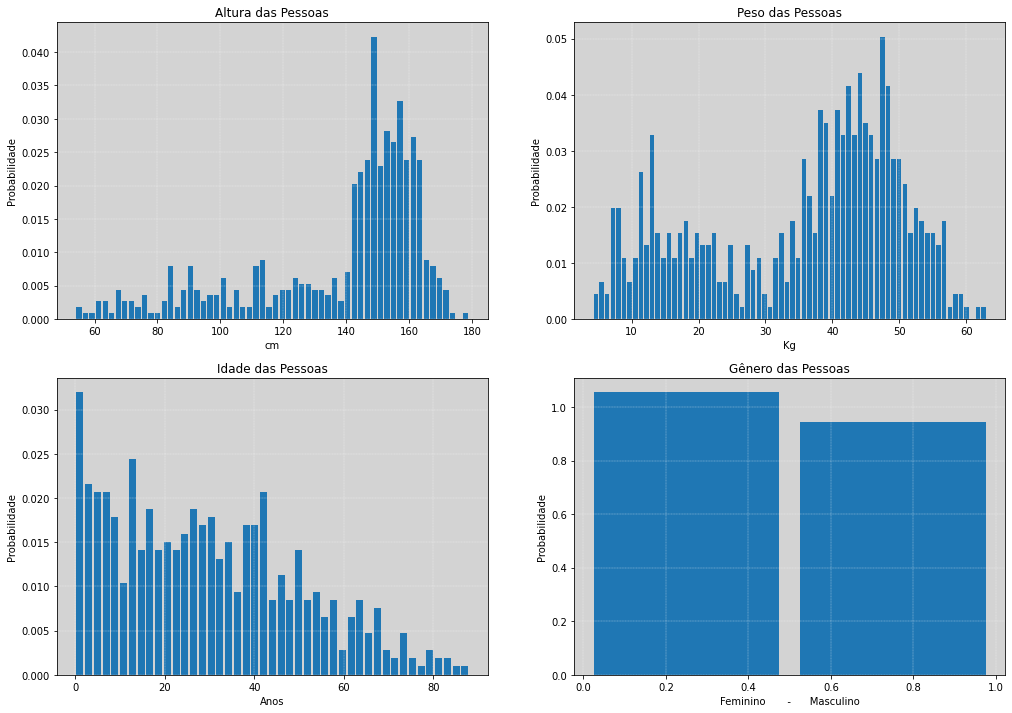

In [5]:
plt.rcParams['axes.facecolor'] = 'lightgray'
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(17, 12))

ax1.hist(df.height, bins=60, density=True, rwidth=0.8)
ax1.set_title('Altura das Pessoas')
ax1.set_xlabel('cm')
ax1.set_ylabel('Probabilidade')
ax1.grid(color='white', linewidth='0.3', ls='--')

ax2.hist(df.weight, bins=70, density=True, rwidth=0.8)
ax2.set_title('Peso das Pessoas')
ax2.set_xlabel('Kg')
ax2.set_ylabel('Probabilidade')
ax2.grid(color='white', linewidth='0.3', ls='--')

ax3.hist(df.age, bins=45, density=True, rwidth=0.8)
ax3.set_title('Idade das Pessoas')
ax3.set_xlabel('Anos')
ax3.set_ylabel('Probabilidade')
ax3.grid(color='white', linewidth='0.3', ls='--')

ax4.hist(df.male, bins=2, density=True,rwidth=0.9)
ax4.set_title('Gênero das Pessoas')
ax4.set_xlabel('Feminino       -      Masculino')
ax4.set_ylabel('Probabilidade')
ax4.grid(color='white', linewidth='0.3', ls='--')

plt.show()

##### Modelos Gaussianos

Um primeiro modelo

$$ h_i \sim Normal(\mu, \sigma) $$

A altura $h$ do indivíduo $i$ será distribuído normalmente, com uma média $\mu$ e o desvio padrão $\sigma$.

-----

Estamos usando as letras gregas $\mu$ e $\sigma$, por conveção de linguagem, mas nada impede que use quaisquer outros simbolos. Não haverá nenhum problema, irá apenas irritar algum estatístico, mas isso será um bônus.

Aqui é necessário que você saiba ler e entender o que isso significa, assim você aprende o que está acontecendo. Lembre-se isso é apenas uma linguagem, isso não é um código. É apenas uma forma de comunicação, uma comunicação científica.

-----

Aqui temos duas variáveis para estimar, $\mu$ e $\sigma$, e teremos que inferir a partir de $h$, das coisas que medimos, mas $\mu$ e $\sigma$ precisam de definições por que esse é um modelo bayesiano.

###### Adicionando prioris

$$ h_i \sim Normal(\mu, \sigma) $$

$$ \mu \sim Normal(178, 20) $$

$$ \sigma \sim Uniform(0, 50) $$

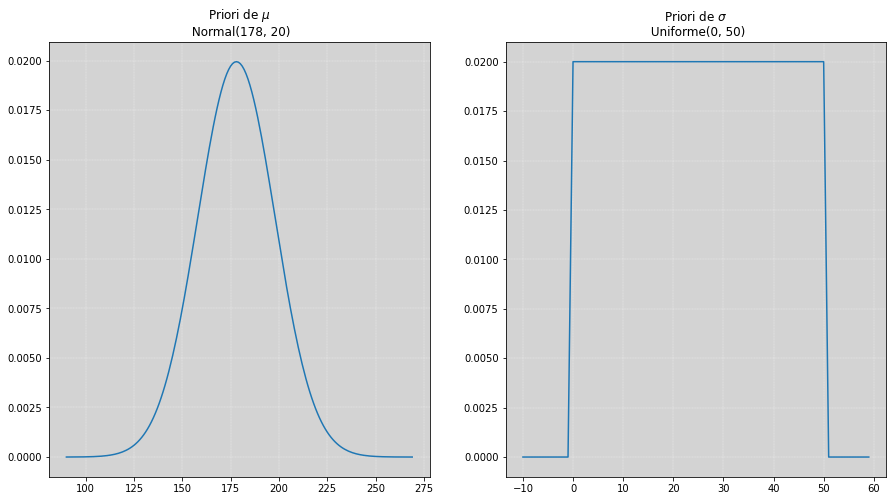

In [6]:
plt.rcParams['axes.facecolor'] = 'lightgray'

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 8))

x_mu = np.arange(90, 270, 1)
x_sigma = np.arange(-10, 60)

ax1.plot(x_mu, stats.norm(178, 20).pdf(x_mu))
ax1.set_title('Priori de $\mu$ \n Normal(178, 20)')
ax1.grid(color='white', linewidth='0.3', ls='--')

ax2.plot(x_sigma, stats.uniform(0, 50).pdf(x_sigma))
ax2.set_title('Priori de $\sigma$ \n Uniforme(0, 50)')
ax2.grid(color='white', linewidth='0.3', ls='--')

plt.show()

Qual é a implicação de usar essas distribuições para $\mu$ e $\sigma$? 

O valor de $178$ escolhido para ser a média da distribuição normal (*à priori*) foi por achar que essa poderia ser a altura média da população com uma generosa incerteza (*incerteza da média*) de $20$.

Para o $\sigma$ colocamos qualquer valor entre $0$ até $50$ tem igual probabilidade de ocorrer, esse é um range bastante razoável já que $50$ é um valor bem mais alto do que podemos esperar para o desvio padrão, pois não temos mais nenhuma informação razoavél colocar como a priori (no mundo real certamente saberiamos um pouco mais).

##### Simulação a partir da priori

O que essas prioris estão implicando sobre a estimativa da altura, antes de ver os dados ($h$)? Simularmos! `Distribuição à Priori Preditivo`.

Simular os dados apenas das priori nos permitirá entender se do modo como estamos ensinando o modelo seu resultado está sendo satisfatório. Vamos simular!


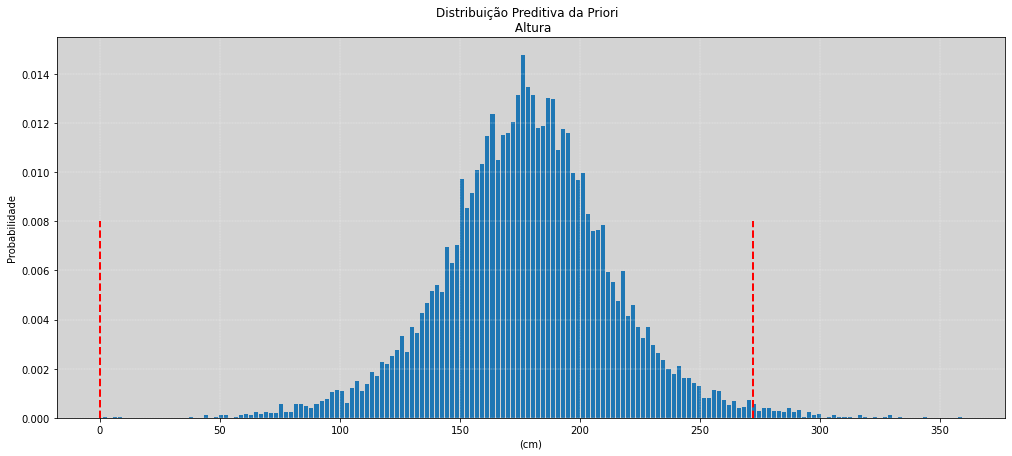

In [7]:
# ========================================================================
# Construindo o processo de amostragem da distribuição à priori preditiva.
# ========================================================================

# Amostragem
amostra_mu = stats.norm(178, 20).rvs(10000)  # Amostra da Normal(178, 20) estimativa para mu.
amostra_sigma = stats.uniform(0, 50).rvs(10000)  # Amostra da Uniforme(0, 50) estimativa para sigma.

amostra_h_priori = stats.norm(amostra_mu, amostra_sigma).rvs()  # Amostrando da Normal(mu, sigma)


# Plot
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.figure(figsize=(17, 7))

plt.hist(amostra_h_priori, bins=171, rwidth=0.8, density=True)
plt.title('Distribuição Preditiva da Priori  \n Altura')
plt.xlabel('(cm)')
plt.ylabel('Probabilidade')

plt.vlines(0, 0, 0.008, color='red', ls='--', linewidth=2)  # 0 cm de altura, ovo fertilizado.
plt.vlines(272, 0, 0.008, color='red', ls='--', linewidth=2)  # 272 cm de altura, pessoa mais alta da história.

plt.grid(color='white', linewidth='0.3', ls='--')

plt.show()

Plotar o gráfico da `Distribiuição Preditiva da Priori` nos permite ver qual a probabilidade, por exemplo, de alguém ter a altura próxima de $0 cm$ é praticamente igual a *zero*, $P\{altura = 0\}$, e também a probabilidade de uma pessoa ser maior do que $272 cm$, $P\{altura >= 272\}$, que é a altura da pessoa mais alta no mundo já registrada, é bem baixa.

Imagine agora que colocaremos como priori valores muito absurdos para o $\sigma$, vejamos o que acontecerá:

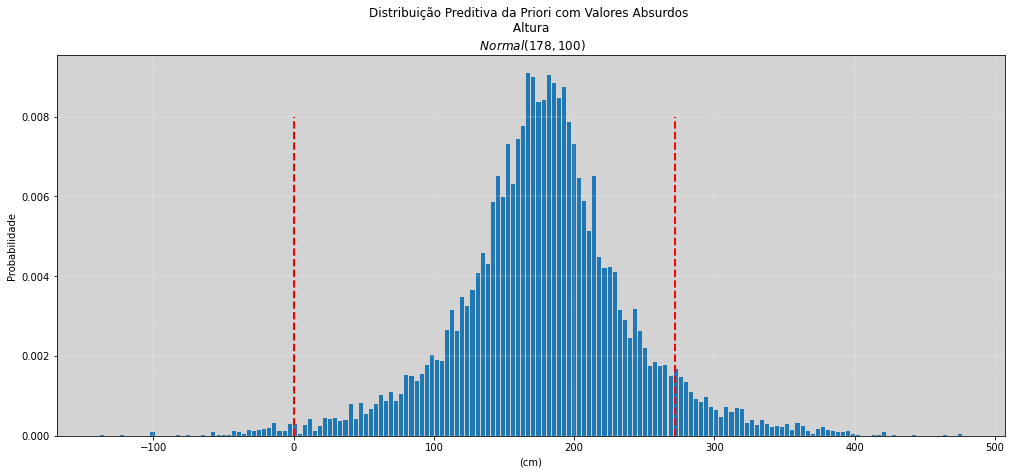

In [8]:
# ========================================================================
# Construindo o processo de amostragem da distribuição à priori preditiva.
#                     Priori versão com dados absurdos
# ========================================================================

# Amostragem
amostra_mu = stats.norm(178, 20).rvs(10000)  # Amostra da Normal(178, 20) estimativa para mu.
amostra_sigma = stats.uniform(0, 100).rvs(10000)  # Amostra da Uniforme(0, 50) estimativa para sigma.

amostra_h_priori = stats.norm(amostra_mu, amostra_sigma).rvs()  # Amostrando da Normal(mu, sigma)


# Plot
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.figure(figsize=(17, 7))

plt.hist(amostra_h_priori, density=True, bins=170, rwidth=0.8)
plt.title('Distribuição Preditiva da Priori com Valores Absurdos \n Altura \n $Normal(178, 100)$')
plt.xlabel('(cm)')
plt.ylabel('Probabilidade')

plt.vlines(0, 0, 0.008, color='red', ls='--', linewidth=2)  # 0 cm de altura, ovo fertilizado.
plt.vlines(272, 0, 0.008, color='red', ls='--', linewidth=2)  # 272 cm de altura, pessoa mais alta da história. 

plt.grid(color='white', linewidth='0.3', ls='--')

plt.show()

Os valores de probabilidade que está sendo atribuído pela priori e que estão para fora dos limites mais conservadores possível, não deveriam ter uma importancia tão grande, ou seja, sua probabilidade deveria tenter a *zero*!

Esse é um exemplo de escolha ruim para uma priori, colocando apenas com um valor enorme para $\sigma$ mas sem ter uma ligação mais intima com a natureza do problema. 

Nesse caso, caso univariado, as distorções que podem ser geradas por usarmos uma priori dessa forma é praticamente nenhuma, o modelo provavelmente ajustará bem. Já para modelos mais complexos como modelo mistos ou modelos hieráquicos com muitos parâmentros, a utilizacão de prioris sem muito sentido podem causar sérias distorções nos resultados. 

Por isso, sempre simule a priori para observar se o comportamento do modelo condiz com a realidade mais plausível. É essa a sua crença antes do modelo ver o dados!


#### Calculando a posteriori

Nosso objetivo é estimar qual a distribuição conjunta dos parâmentros $\mu$ e $\sigma$, iremos fazer a estimativa via método da aproximação de grid.

$$ p\{(\mu, \sigma) | h_i\} ∝ p\{h_i | \mu, \sigma \} p\{ \mu \} p\{ \sigma \} $$

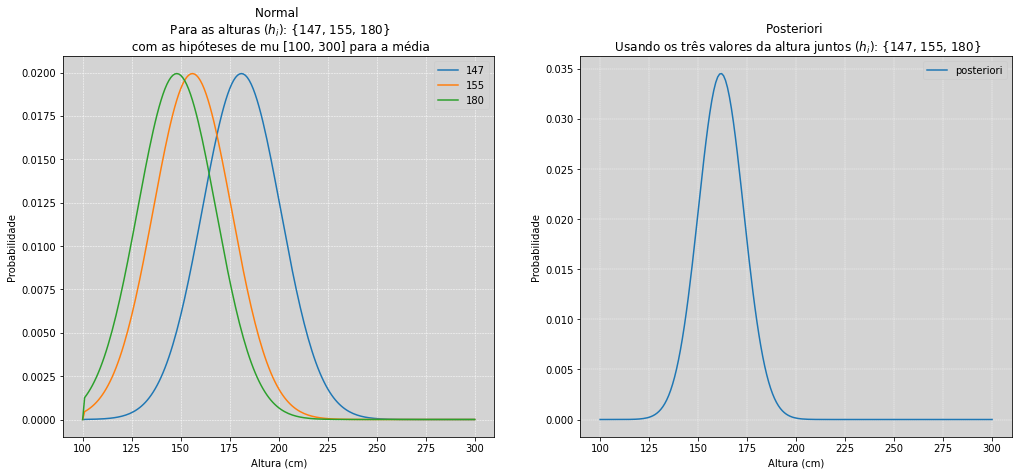

In [9]:
# Para visualização das multiplicações vamos deixar o sigma fixo, em 20 por exemplo, 
#  e iremos variar o mu para três valores distintos de alturas (180, 155, 147).

curva_1 = 0
curva_2 = 0
curva_3 = 0

posteriori = np.array([])

for mu in np.arange(100, 300, 1):
    curva_1 = np.append(curva_1, stats.norm(mu, 20).pdf(180))
    curva_2 = np.append(curva_2, stats.norm(mu, 20).pdf(155))
    curva_3 = np.append(curva_3, stats.norm(mu, 20).pdf(147))
    
# Plot
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 7))
ax1.plot(np.arange(100, 301), curva_1)
ax1.plot(np.arange(100, 301), curva_2)
ax1.plot(np.arange(100, 301), curva_3)
ax1.set_title('Normal \n Para as alturas ($h_i$): {147, 155, 180} \n com as hipóteses de mu [100, 300] para a média')
ax1.set_xlabel('Altura (cm)')
ax1.set_ylabel('Probabilidade')
ax1.grid(color='white', linewidth='0.5', ls='--')
ax1.legend(['147', '155', '180'])

posteriori_nao_normalizada = curva_1 * curva_2 * curva_3   # Essa multiplicação será feita ponto a ponto.
posteriori = posteriori_nao_normalizada / np.sum(posteriori_nao_normalizada)  # Normalizando a posteriori
ax2.plot(np.arange(100, 301), posteriori)  # Essa multiplicação será feita ponto a ponto.
ax2.set_title('Posteriori \n Usando os três valores da altura juntos ($h_i$): {147, 155, 180}')
ax2.set_xlabel('Altura (cm)')
ax2.set_ylabel('Probabilidade')
ax2.grid(color='white', linewidth='0.4', ls='--')
ax2.legend(['posteriori'])

plt.show()

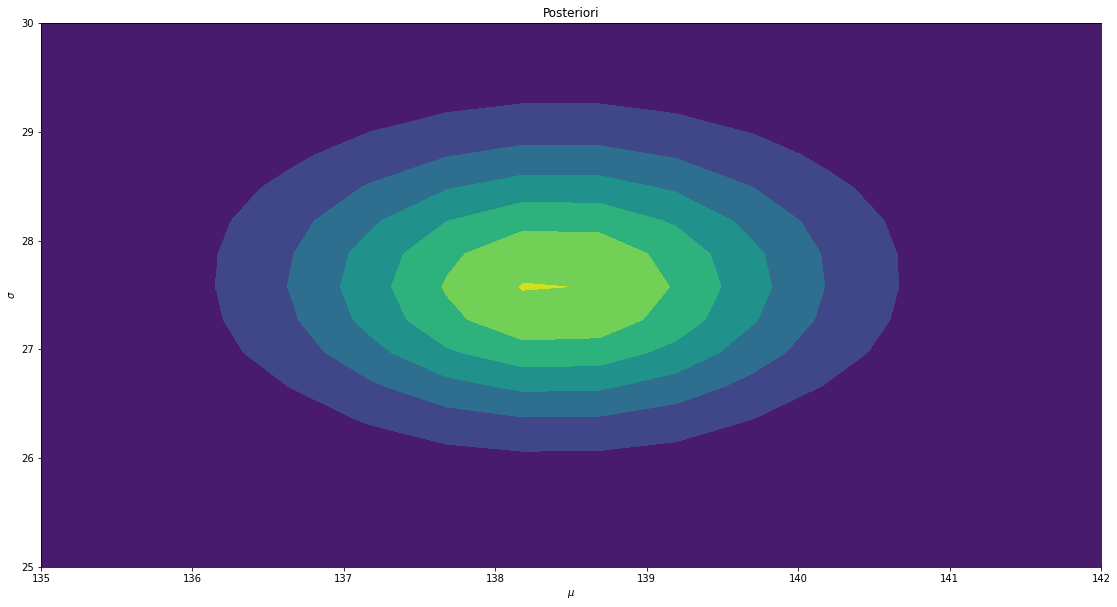

In [10]:
# ================================
#     Calculando a posteriori
# ================================

grid = 100  # Determina a precisão, valores maiores demanda maior custo computacional

mu_ls = np.linspace(120, 170, grid)  
sigma_ls = np.linspace(10, 40, grid)  
mu, sigma = np.meshgrid(mu_ls, sigma_ls)

mu = mu.flatten()
sigma = sigma.flatten()

verossimilhanca = np.array([])

for i in range(grid**2):
    verossimilhanca_parcial = stats.norm(mu[i], sigma[i]).pdf(df.height)
    verossimilhanca_parcial_log = np.log(verossimilhanca_parcial.flatten())
    verossimilhanca = np.append(verossimilhanca, np.sum(verossimilhanca_parcial_log))

# Adicionando a priori
# P{x | mu, sigma} * P{mu} * P{sigma}
# exp( log(P{x | mu, sigma}) + log(P{mu}) + log(P{sigma}) )
posteriori_nao_normalizada = verossimilhanca + \
                             np.log(stats.norm(178, 20).pdf(mu.flatten())) + \
                             np.log(stats.uniform(0, 50).pdf(sigma.flatten()))   # Priori de sigma
    
posteriori = np.exp(posteriori_nao_normalizada - max(posteriori_nao_normalizada))  # Por que isso? Está no livro, pg.85 - R code 4.16 
posteriori = posteriori / posteriori.sum()

plt.figure(figsize=(19, 10))
mu_mesh, sigma_mesh = np.meshgrid(mu_ls, sigma_ls, sparse=True)

plt.contourf(mu_mesh.flatten(), sigma_mesh.flatten(), posteriori.reshape((grid, grid)))

plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Posteriori')

plt.xlim(135, 142)
plt.ylim(25, 30)

plt.show()

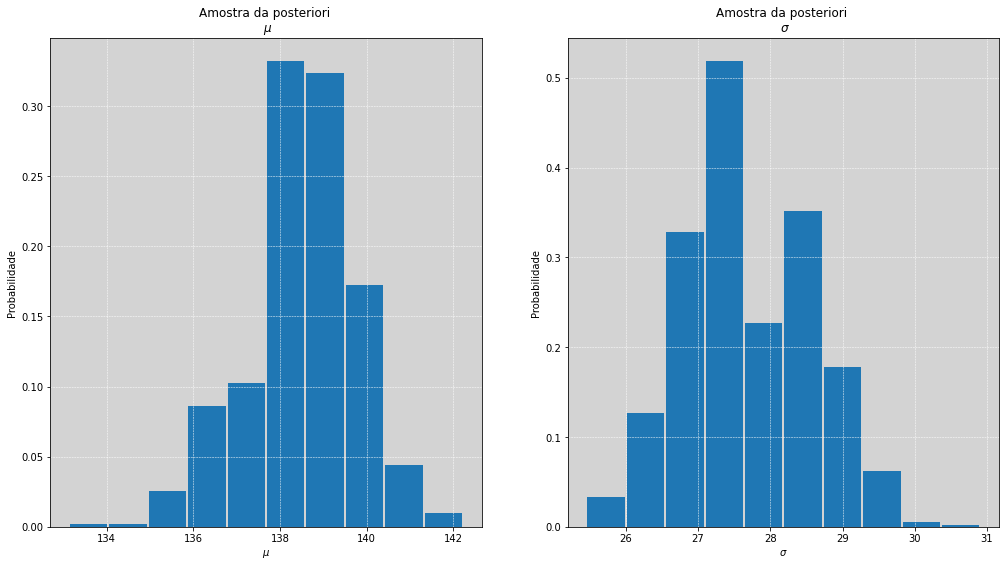

In [11]:
# Amostrando mu e sigma a partir da posteriori

amostras_posteriori_index = np.random.choice(np.arange(grid*grid), size=1000, replace=True, p=posteriori)

mu_amostrado = mu[amostras_posteriori_index]
sigma_amostrado = sigma[amostras_posteriori_index]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 9))

ax1.hist(mu_amostrado, bins=10, rwidth=0.95, density=True)
ax1.set_title('Amostra da posteriori \n $\mu$')
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('Probabilidade')
ax1.grid(color='white', ls='--', linewidth=0.5)

ax2.hist(sigma_amostrado, bins=10, rwidth=0.95, density=True)
ax2.set_title('Amostra da posteriori \n $\sigma$')
ax2.set_xlabel('$\sigma$')
ax2.set_ylabel('Probabilidade')
ax2.grid(color='white', ls='--', linewidth=0.5)

plt.show()

#### Aproximação Quadrática

A partir de agora até a metade do curso iremos usar a `aproximação quadrática`. Se você fez os cálculos da posteriori para a altura, oque é sugerido fortemente, percebemos que a complexidade e o custo computacional envolvido para estimar as duas variáveis ($\mu$ e $\sigma$) são bastante significativos.

Para modelos que necessitem estimar mais parâmetros, 10 por exemplo, o custo computacional e a estrutura necessária para calcular essa estimativa com o método do grid de aproximação se torna inviável. Por isso temos que pensar em uma nova estrutura na qual podemos, **Laplace**, $1749-1827$, propõem usar a aproximação quadrática. Com essa estrutura mais exótica, nós poderemos calcular estimativas da posteriori em dimensões muito elevadas.

- Aproximação da posteriori como uma Gaussiana

- Podemos estimar com encontrando o valor de duas coisas:
    
    - Pelo "pico" da posteriori, *maximum a posteriori* (MAP)
    
    - Desvio Padrão e a correlação entre os parâmetros.
    
- As estimativas são bem parecidas com o que já fizemos, exceto que não temos prioris.
 
Para a primeira coisa, temos que, ao olhar para a posteriori (os histogramas acima) de $\mu$ e $\sigma$ e subir a colina até encontrar o pico. O computador pode começar a busca por qualquer local sem saber onde está o pico, mas ele sabe subir a colina e então pode simplismente subir a colina, usando o apenas o *gradiente descendentes* (ou melhor, usando o gradiente ascendente, pois iremos escalar a subida até o pico). Existem muitos algoritmos eficiêntes para fazer isso, e podemos dar a ele um espaço multidimensional muito alto (bem maior que 2, como no exemplo anterior) e iremos alcançar o pico.

Quando alçarmos o pico, só precismos medir a curvatura no pico para saber a largura da colina e isso é tudo que precisa ser feito para construirmos a `aproximação quadrática`. Também conhecida por `Aproximação de Laplace`, por ele ter utilizado o procedimento corretamente.

<img src="./images/Laplace.jpg" alt="Laplace">

----
Fonte: [wikipedia](https://fr.wikipedia.org/wiki/Pierre-Simon_de_Laplace)



Obs: No curso original, as estimativas são realizadas com a biblioteca `Rethinking` criadas e disponibilizadas pelo github do próprio professor Richard McElreath, pode ser acessado nesse endereço: https://github.com/rmcelreath/rethinking

A partir daqui iremos fazer em paralelo com o curso a utilização da biblioteca Stan-mc a página e a documentação oficial se encontram em [Stan](https://mc-stan.org/)

<img src="./images/stan-logo.png" alt="stan">

Obs2: a estimativa da posteriori feita pela Stan utiliza algumas técnicas mais robustas do que a aproximação quadrática, porém no curso, essa estimativa é realiza internamente na biblioteca rethinking e é invisível para o usuário, assim, o conteúdo dessas notas serão intimamente paralelas com o curso, sendo que se ocorrer um distânciamento entre ambas trajetórias, notas extras serão inseridas para minimizar esse longor.



In [12]:
import stan

In [13]:
primeiro_codigo_stan = """
data {
    int N;
    real X[N];
}

parameters {
    real mu;
    real<lower=0> sigma;
}

model {
    // mu ~ normal(60, 30);   // Priori para mu
    // sigma ~ halfnormal(25); // Priori para sigma
    
    X ~ normal(mu, sigma);
}
"""

X = np.random.normal(50, 12, 1000)  # Dados ~ Normal(50, 12)
meus_dados = {'N': len(X), 'X': X}

posteriori_model = stan.build(primeiro_codigo_stan, data=meus_dados)

fit = posteriori_model.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Messages from stanc:
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!


  mu médio:  50.47
  sigma médio:  12.41


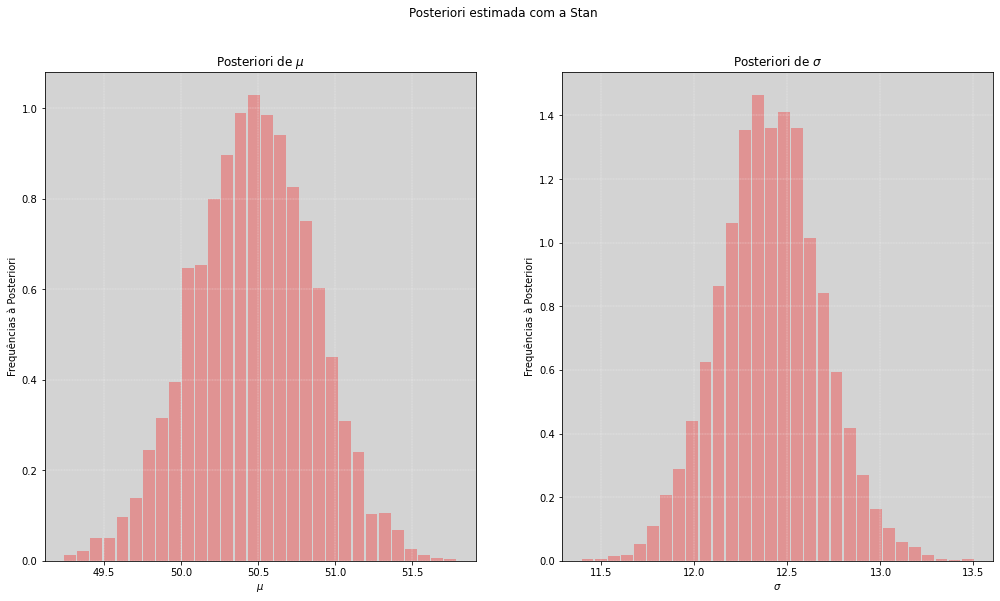

In [14]:
# Recuperando os parâmetros
mu_modelo_1 = fit['mu']
sigma_modelo_1 = fit['sigma']

print('='*30)
print('  mu médio: ', round(mu_modelo_1.mean(), 2))
print('  sigma médio: ', round(sigma_modelo_1.mean(), 2))
print('='*30)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 9))

fig.suptitle("Posteriori estimada com a Stan")

ax1.hist(mu_modelo_1.flatten(), bins=30, rwidth=0.9, density=True, color='red', alpha=0.3)
ax1.grid(color='white', ls='--', linewidth=0.3)
ax1.set_title('Posteriori de $\mu$')
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('Frequências à Posteriori')

ax2.hist(sigma_modelo_1.flatten(), bins=30, rwidth=0.9, density=True, color='red', alpha=0.3)
ax2.grid(color='white', ls='--', linewidth=0.3)
ax2.set_title('Posteriori de $\sigma$')
ax2.set_xlabel('$\sigma$')
ax2.set_ylabel('Frequências à Posteriori')

plt.show()

##### Estimando a altura usando a Stan

De volta ao exemplo anterior, vamos estimar a altura $h_i$ usando um modelo escrito em Stan.

In [15]:
modelo_altura = """
    data {
        int N;
        real altura[N];
    }

    parameters {
        real mu;
        real<lower=0> sigma;
    }

    model {
        // mu ~ normal(178, 20);   // Priori para mu
        // sigma ~ uniform(1, 50);  // Priori para sigma

        altura ~ normal(mu, sigma);
    }
"""

altura = df.height.values

# Como recomenda a documentação https://mc-stan.org/docs/2_22/stan-users-guide/standardizing-predictors-and-outputs.html
# Iremos rescalonar o vetor de altura antes de mandar para a Stan
altura_media = altura.mean()
altura_std = altura.std()
altura_resc = (altura - altura_media) / altura_std

dados = {'N': len(altura), 'altura': altura}  # Iremos usar a altura não normalizada para efeito de simplificação.

posteriori_model = stan.build(modelo_altura, data=dados)
fit_altura = posteriori_model.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Messages from stanc:
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.03 seconds.
  Adjust your expectations accordingly!


Comparativo com a amostra
  mu amostrado:  138.26
  sigma amostrado:  27.6
  mu médio:  138.25
  sigma médio:  27.66


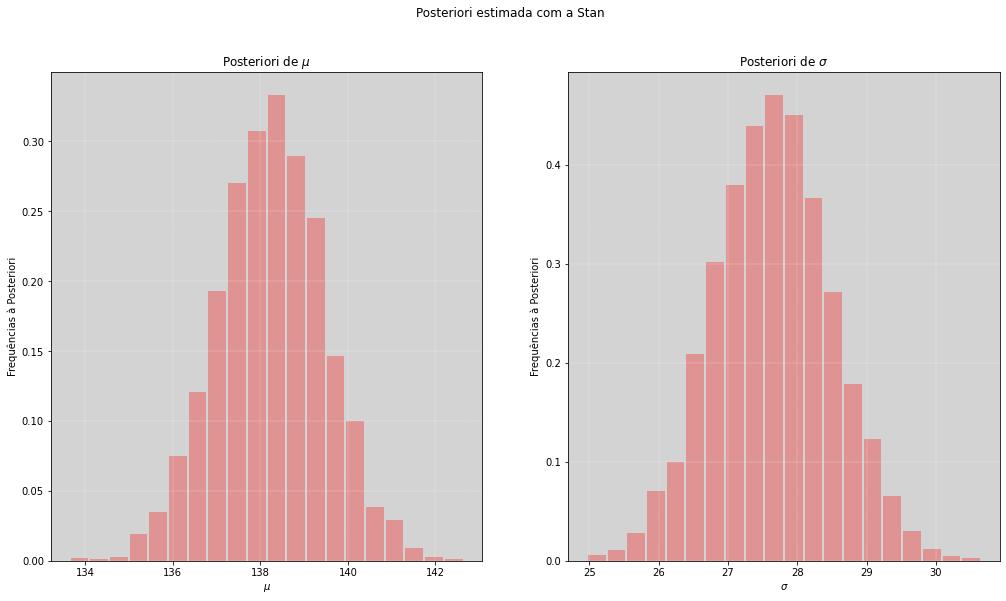

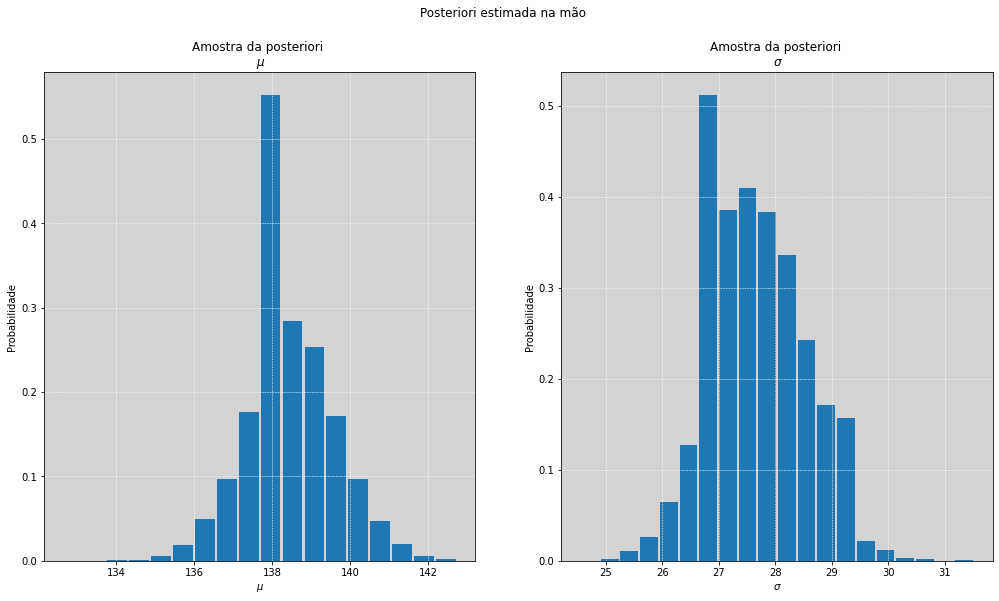

In [16]:
# =============================
#  Modelo calculado na Stan
# =============================

# Recuperando os parâmetros
mu_altura = fit_altura['mu']
sigma_altura = fit_altura['sigma']
print('Comparativo com a amostra')
print('='*30)
print('  mu amostrado: ', round(df.height.mean(), 2))
print('  sigma amostrado: ', round(df.height.std(), 2))
print('='*30)
print('  mu médio: ', round(mu_altura.mean(), 2))
print('  sigma médio: ', round(sigma_altura.mean(), 2))
print('='*30)


fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 9))

fig.suptitle("Posteriori estimada com a Stan")

ax1.hist(mu_altura.flatten(), bins=20, rwidth=0.9, density=True, color='red', alpha=0.3)
ax1.grid(color='white', ls='--', linewidth=0.3)
ax1.set_title('Posteriori de $\mu$')
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('Frequências à Posteriori')

ax2.hist(sigma_altura.flatten(), bins=20, rwidth=0.9, density=True, color='red', alpha=0.3)
ax2.grid(color='white', ls='--', linewidth=0.3)
ax2.set_title('Posteriori de $\sigma$')
ax2.set_xlabel('$\sigma$')
ax2.set_ylabel('Frequências à Posteriori')

plt.show()

# =============================
#  Modelo calculado na mão
# =============================
# Amostrando mu e sigma a partir da posteriori calculada na mão (exemplo construído acima)

amostras_posteriori_index = np.random.choice(np.arange(grid*grid), size=10000, replace=True, p=posteriori)

mu_amostrado = mu[amostras_posteriori_index]
sigma_amostrado = sigma[amostras_posteriori_index]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 9))

fig.suptitle("Posteriori estimada na mão")

ax1.hist(mu_amostrado, bins=18, rwidth=0.9, density=True)
ax1.set_title('Amostra da posteriori \n $\mu$')
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('Probabilidade')
ax1.grid(color='white', ls='--', linewidth=0.5)

ax2.hist(sigma_amostrado, bins=20, rwidth=0.9, density=True)
ax2.set_title('Amostra da posteriori \n $\sigma$')
ax2.set_xlabel('$\sigma$')
ax2.set_ylabel('Probabilidade')
ax2.grid(color='white', ls='--', linewidth=0.5)

plt.show()

#### Adicionando uma variável preditora

Como a variável peso (*weight*) descreve a altura (*height*)?

*Obs: Iremos utilizar apenas pessoas que tenham acima de 18 anos de idade para todos os estudo seguintes, apenas simplesmente como efeito didático.*

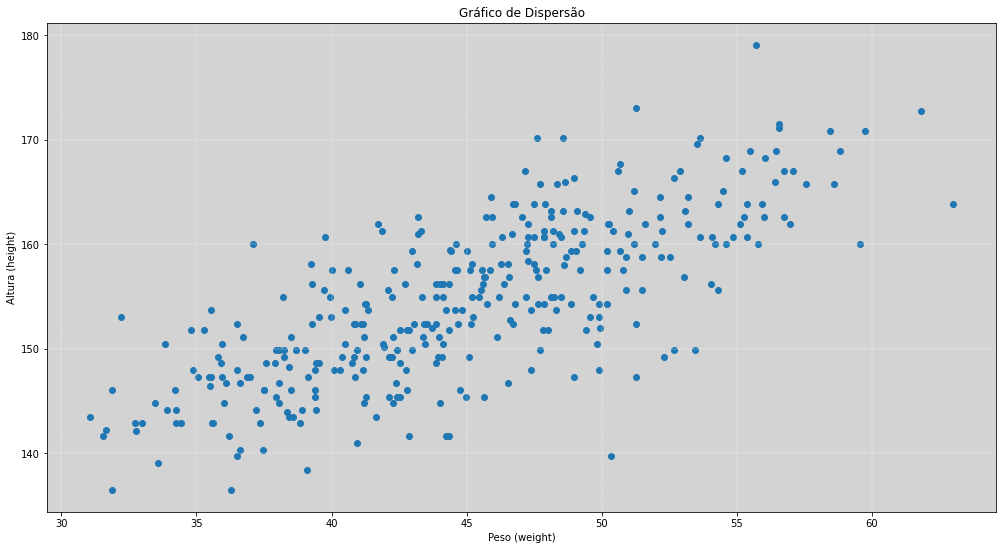

In [17]:
# Gráfico de dispersão - peso ajudar a identificar qual a altura.
plt.figure(figsize=(17, 9))
plt.scatter(df.loc[df.age >= 18, 'weight'],  # Filtro para todos as pessoas que tem acima de 30 kilos
            df.loc[df.age >= 18, 'height'])
plt.title('Gráfico de Dispersão')
plt.xlabel('Peso (weight)')
plt.ylabel('Altura (height)')
plt.grid(color='white', ls='--', linewidth=0.4)

plt.show()

Usando um modelo linear de média, $\mu$:

$$ h_i \sim Normal(\mu_i, \sigma), \mbox{ [Verossimilhaças] }$$


$$ mu_i = \alpha + \beta(x_i + \bar{x}), \mbox{ [Modelo Linear] } $$


$$  \alpha \sim Normal(178, 20), \mbox{ [Priori de }\alpha \mbox{]} $$


$$  \beta \sim Normal(0, 10), \mbox{ [Priori de }\beta \mbox{]} $$


$$  \sigma \sim Uniform(0, 50), \mbox{ [Priori de }\sigma \mbox{]} $$

Vamos agora ver uma reta, um modelo linear. Até agora o que nós fizemos foram inferências de 1 ou 2 parâmetros que podem ser aproximadas como uma gaussiana.



Mas o que significa fazer um modelo linear, ou utilizar um reta no modelo? Isso significa que podemos adicionar uma nova variável que irá nos ajudar a melhorar nosso entendimento da variável `altura`. Essa nova variável terá a função, dentro do nosso modelo, de predizer, ou seja, dizer antecipadamente, antever, advinhar, prever qual é a da altura do indivíduo, probabilisticamente. Chamamos todas essas variáveis que podemos nos ajudar como `variáveis preditoras`.


A principal ideia em adicionar uma variável preditora, assim como outras variáveis do nosso conjunto de dados, é que quando aprendemos, podemos fazer podemos fazer melhores previsões sobre o resultado de interesse, que nesse caso, é a `altura`.


Para ficar mais claro, quando pretendemos saber a altura de uma pessoa sem termos nenhuma informação adicional sobre a pessoa, o melhor que podemos fazer é usar a estimativa da altura da população para estimar a altura desse indivíduo. É o máximo que podemos fazer com as informações que temos disponíveis.
Mas se esse mesmo indivíduo, assim como todos na nossa amotras, nos informarem uma característica a mais para nós estimarmos sua altura. Nesse exemplo, o peso é uma das informações adicionais, *preditoras*, para termos mais conhecimento sobre a altura. 


##### Explicando o modelo acima:

Agora temos que $h_i$ também contínua distribuído como uma `Gaussiana` como no exemplo anterior, porém agora a média $\mu$ não é apenas distribuída normalmente com a média fixa em 178, dependerá de cada indivíduo $i$, assim $ \mu_i = \alpha + \beta(x_i + \bar{x}) $, $x_i$ representa uma pessoa em particular.

Em instante iremos entender melhor o que significa todos os termos de $\mu$. O $\alpha$ e o $\sigma$ continuam com as mesmas prioris do exemplo anterior, e agora temos uma nova distribuição à priori para $\beta$, que é o responsável por descrever a relação entre `altura` e o `peso`.

Observando mais profundamente a estrutura que criamos nosso novo modelo:

$$ \mu_i = \alpha + \beta(x_i + \bar{x}) $$


- $\mu_i$ = é a média da linha i



- $\alpha$ = é a altura média da quando $x_i = \bar{x}$, conhecida como o `intercepto`. (*Lindo!!!*)



- $\beta$ = taxa de mudança para $\mu$ cada unidade de mundaça de $x_i$, conhecido como a `inclinação`.

Se por acaso o $\beta$ for zero, estamos novamente no modelo anterior. Ou seja, estamos dizendo que não há relação  transmitida para o $\mu$ a partir do peso. Do contrário, cada número que o $x_i$ sobe, subimos $\beta$ o $\mu$.

Escrever nossos modelos lineares dessa forma nos permite entender e definir melhor os parâmetros e nossa prioris, mas nem todos os modelos devem ser escritos dessa forma e nesse caso deveremos ter uma boa justificativa.

#### Distribuição Priori Preditiva

Quais são as prioris desse modelo e o que essas prioris significam?

Como no exemplo anterior, vamos simular para entender e compreender as implicações do modelo.


In [18]:
(65-30)/2

17.5

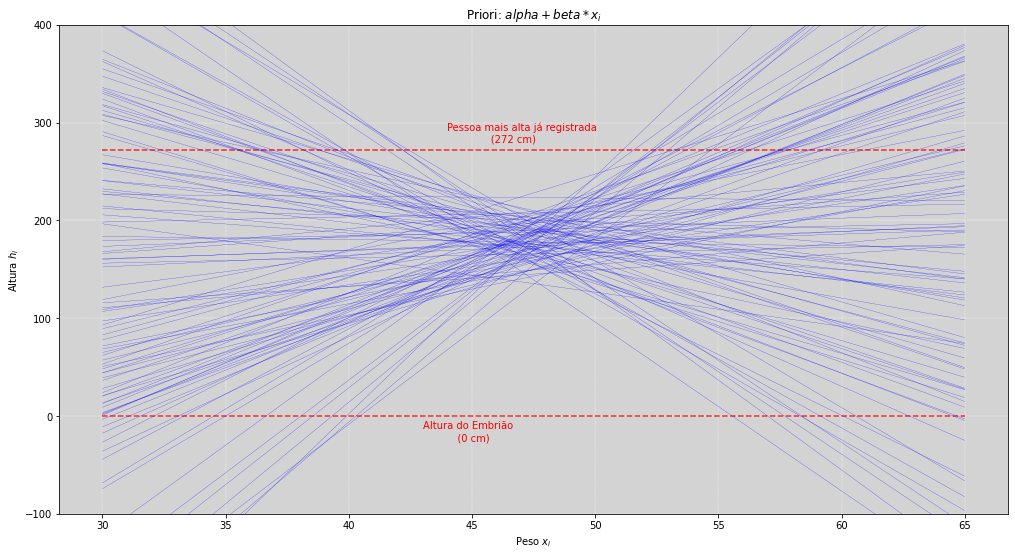

In [19]:
# ===========================
#     Simulando a Priori
# ===========================

N = 100  # A quantidade de vezes que iremos simular os dados da priori

alpha_priori = np.random.normal(178, 20, N)
beta_priori = np.random.normal(0, 10, N)

plt.figure(figsize=(17, 9))

for i in range(N):
    plt.plot(np.linspace(30, 65, N), alpha_priori[i] + beta_priori[i] * (np.linspace(-17.5, 17.5, N)), # (x_i - x_bar)
             color='blue', linewidth=0.2)

plt.ylim(-100, 400)
plt.hlines(0, 30, 65, ls='--', color='red', alpha=0.8)  # Linha inferior vermelha: Altura óvulo fertilizado (0cm)  
plt.hlines(272, 30, 65, ls='--', color='red', alpha=0.8)  # Linha superior vermelha: Pessoa mais alta do mundo (272 cm)
  
plt.annotate('Pessoa mais alta já registrada \n              (272 cm)', (44, 280), color='red')
plt.annotate('Altura do Embrião \n           (0 cm)', (43, -25), color='red')
plt.title('Priori: $alpha + beta * x_i$')
plt.ylabel('Altura $h_i$')
plt.xlabel('Peso $x_i$')

plt.grid(color='white', ls='--', linewidth=0.4)
plt.show()

Analisando as retas, resultados da simulação da priori para $\alpha$ e $\beta$, podemos ver que muitas linhas estão superiores a altura de $272 cm$. Também podemos ver que existem linhas que indicam alturas menores que zero, o que naturalmente deveria estar errado. Ambos comportamentos são prioritariamente resutantes dos valores gerados pela distribuição dos $\beta$, a inclinação da reta. Assim, essas retas são nossas crenças à priori.

Agora que temos um pouco mais de intimidade com o comportamento das nossas prioris, podemos concluir que devemos diminuir nosso entusiasmos com relação ao $\beta$, pois essa é uma priori muito ruim. Haverá momentos, em situações reais, que será necessário verificar a compatibilidade com o mundo real. Faça alterações nas prioris para verificar a mudança no efeito.

#### Distribuição Preditiva da Priori

Nós agora sabemos algo sobre as prioris, temos um conhecimento científico sobre a nossa distribuição dos $\beta$'s, sabemos que ele é positivo, assim, então, vamos transforma-lo em positivo? 


Mas como?


Para fazer isso, usaremos a distribuição `log-Normal`. Essa distribuição pode ser um pouco menos conhecida, porém é muito útil para situações desse tipo. Essa distribuição, log-Normal, construída partir da exponenciação dos valores da distribuição Normal.

 $$lognormal(0, 1) = exp\{ Normal(0, 1)\}$$ 

Na teoria das probabilidades, uma distribuição log-normal (ou lognormal) é uma distribuição de probabilidade contínua de uma variável aleatória cujo logaritmo é normalmente distribuído.

Assim, se a variável aleatória $X$ é log-normalmente distribuída, então $Y = log(X)$ tem uma distribuição normal. *(Ref. Wikipedia)*

Referências:
- [Numpy - Log-Normal](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm)

- [Scipy - Log-Normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.lognormal.html)

- [Wikipedia - Log-Normal](https://en.wikipedia.org/wiki/Log-normal_distribution)


-----

Um caminho para se entender melhor o que é uma $lognormal$ é o seguinte:

Qual é a distribuição de $X$ que, ao aplicarmos o log, ela se tornará $Normal$? Naturalmente temos que:

se

$$ a = log(exp(a)) $$

então:

$$ X \sim exp\{Normal\} $$

pois,

$$  log(exp\{Normal\}) = Normal $$

ou seja,

$$ log(X) = Normal $$

então:

$$ X \sim lognormal $$

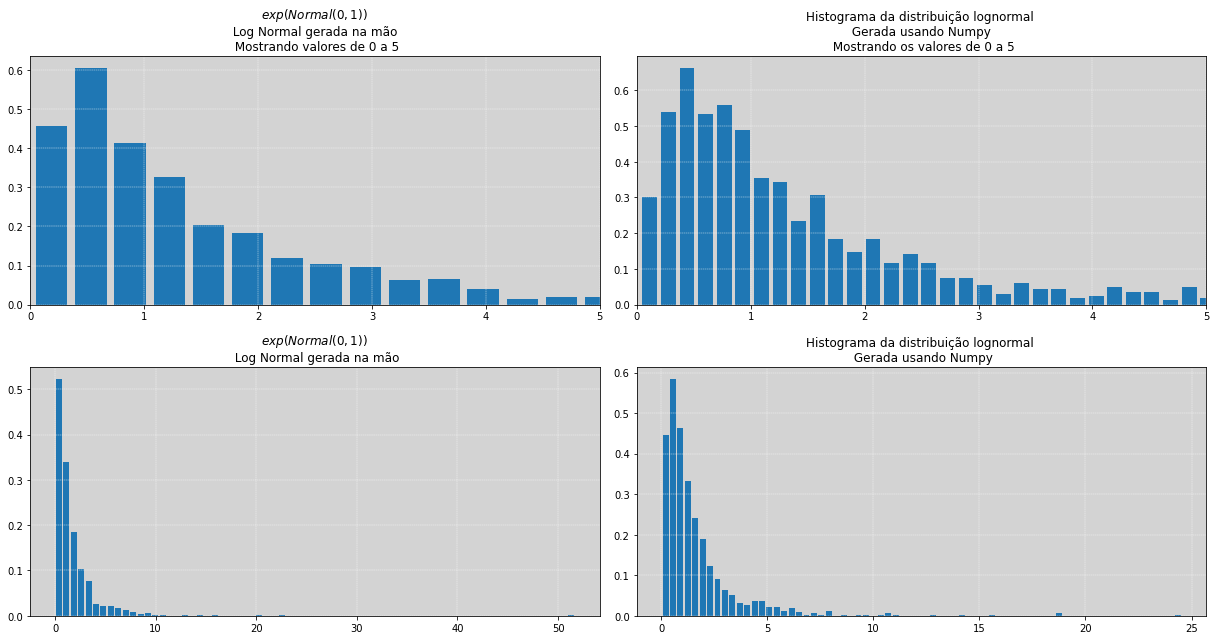

In [20]:
# =====================================
#     Estudos sobre as Log-Normais 
# =====================================

d_normal = np.random.normal(0, 1, 1000)
d_lognormal = np.random.lognormal(0, 1, 1000)

fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(17, 9))

ax1.hist(np.exp(d_normal), bins=150, density=True, rwidth=0.8)
ax1.set_xlim(0, 5)
ax1.set_title('$exp( Normal(0,1) )$ \n Log Normal gerada na mão \n Mostrando valores de 0 a 5')
ax1.grid(color='white', ls='--', linewidth=0.4)

ax2.hist(d_lognormal, bins=150, density=True, rwidth=0.8)
ax2.set_xlim(0, 5)
ax2.set_title('Histograma da distribuição lognormal \n Gerada usando Numpy \n Mostrando os valores de 0 a 5')
ax2.grid(color='white', ls='--', linewidth=0.4)

ax3.hist(np.exp(d_normal), bins=70, density=True, rwidth=0.8)
ax3.set_title('$exp( Normal(0,1) )$ \n Log Normal gerada na mão')
ax3.grid(color='white', ls='--', linewidth=0.4)


ax4.hist(d_lognormal, bins=70, density=True, rwidth=0.8)
ax4.set_title('Histograma da distribuição lognormal \n Gerada usando Numpy')
ax4.grid(color='white', ls='--', linewidth=0.4)

plt.tight_layout()  # Ajustar as distâncias entre os gráficos
plt.show()

Com a lognormal introduzida, iremos trocar a distribuição da a priori de $\beta \sim Normal(0, 10)$ para uma priori que é distribuída conforme uma $\beta \sim lognormal(0, 1)$.

Assim como antes, vamos simular para entender o novo comportamento da nossa priori. 

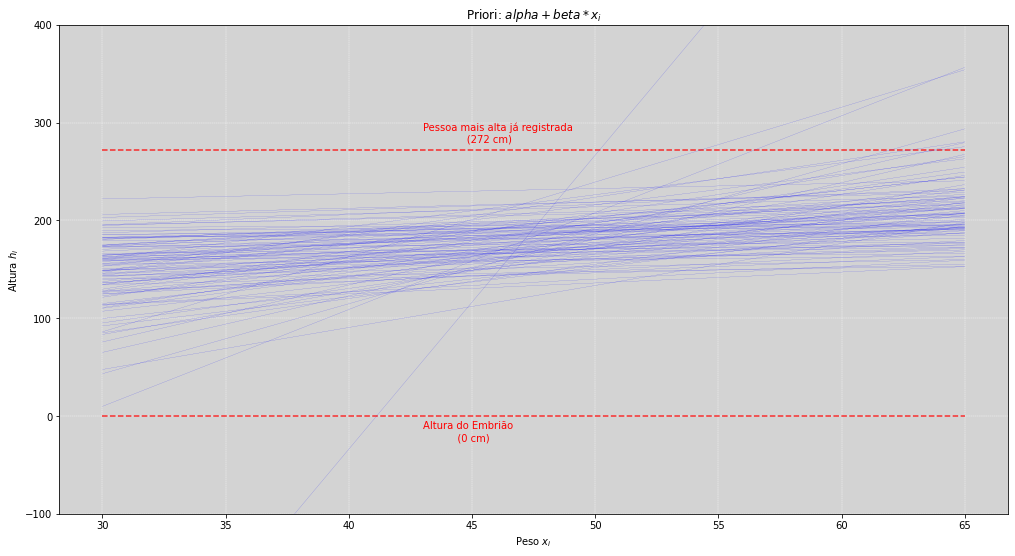

In [21]:
# ==========================================
#     Simulando a priori com log-normal
# ==========================================

N = 100  # A quantidade de vezes que iremos simular os dados da priori

alpha_priori = np.random.normal(178, 20, N)
beta_priori = np.random.lognormal(0, 1, N)  # Priori lognormal(0, 1)

plt.figure(figsize=(17, 9))

for i in range(N):
    plt.plot(np.linspace(30, 65, N), alpha_priori[i] + beta_priori[i] * (np.linspace(-17.5, 17.5, N)), # (x_i - x_bar)
             color='blue', linewidth=0.1)

plt.ylim(-100, 400)
plt.hlines(0, 30, 65, ls='--', color='red', alpha=0.8)  # Linha inferior vermelha: Altura óvulo fertilizado (0cm)  
plt.hlines(272, 30, 65, ls='--', color='red', alpha=0.8)  # Linha superior vermelha: Pessoa mais alta do mundo (272 cm)
  
plt.annotate('Pessoa mais alta já registrada \n              (272 cm)', (43, 280), color='red')
plt.annotate('Altura do Embrião \n           (0 cm)', (43, -25), color='red')
plt.title('Priori: $alpha + beta * x_i$')
plt.ylabel('Altura $h_i$')
plt.xlabel('Peso $x_i$')

plt.grid(color='white', ls='--', linewidth=0.4)
plt.show()

Nós ainda temos muita dispersão e também temos ainda algumas poucas linhas que ultrapassam a maior altura já registrada (de $272 cm$). Isso acontece pois não limitamos a nossa margem superior pela distribuição de $\beta$. Mas essa nossa nova abordagem parece ser uma priori bem mais condizente com o que podemos imaginar.

#### Aproximação da posteriori

Vamos fazer a aproximação da posteriori usando a Stan e verificar os resultados.

In [22]:
# =================================================================
#   Aproximando a posteriori da altura usando o peso da pessoa
# =================================================================

modelo_altura_2 = """
    data {
        int N;
        real x_barra;
        real altura[N];
        real peso[N];
    }

    parameters {
        real alpha;
        real<lower=0> beta;
        real<lower=0> sigma;
    }

    model {
        // alpha ~ normal(178, 20);
        // beta ~ lognormal(0, 1);
        // sigma ~ uniform(0, 50);

        for (i in 1:N){
            altura[i] ~ normal(alpha +  beta * (peso[i] - x_barra), sigma);
        }
}
"""
# Nossa amostra é apenas para pessoas acima de 18 anos
df_maioridade = df.loc[df.age >= 18, ['weight', 'height']]

# Definindo as variáveis
N = len(df_maioridade)
x_barra = df_maioridade.weight.mean()
altura = df_maioridade.height.values
peso = df_maioridade.weight.values

# Construindo o dicionário
meus_dados_2 = {'N': N, 
                'x_barra': x_barra, 
                'altura': altura, 
                'peso': peso}

# Rodando o modelo
posteriori_model_2 = stan.build(modelo_altura_2, data=meus_dados_2)
fit_altura_2 = posteriori_model_2.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Messages from stanc:
Sampling:   0%
Sampling:  11% (900/8000)
Sampling:  36% (2900/8000)
Sampling:  61% (4900/8000)
Sampling:  86% (6900/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 6.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.52 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Location parameter is inf, but must be finite! (in '/tmp/httpstan_ycln97nd/model_r345qpqw.stan', line 21, column 12 to column 75)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler 

Resumo das posterioris:
Media alpha:  154.6  - Desvio Padrão alpha:  0.271
Média beta:   0.906  - Desvio Padrão beta:   0.042
Média sigma:  5.112  - Desvio Padrão sigma:  0.189


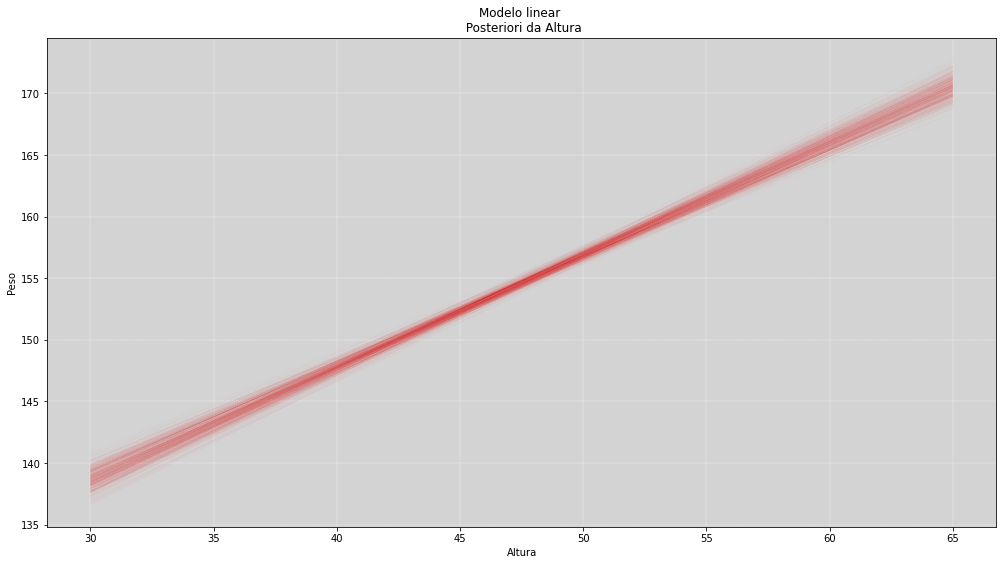

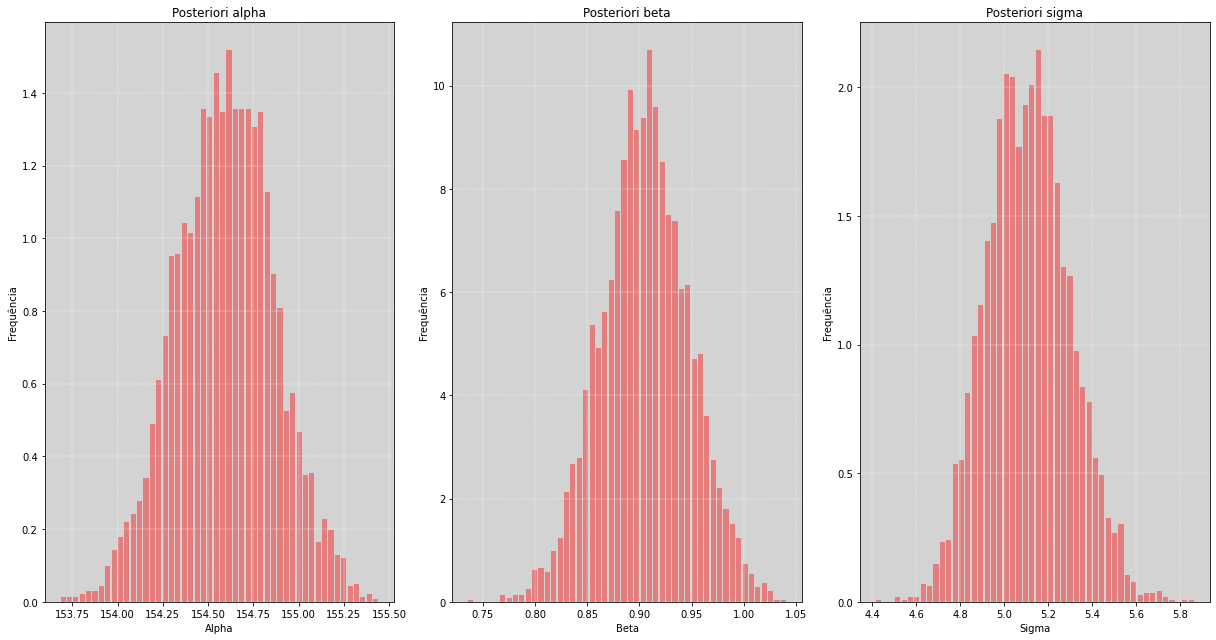

In [23]:
# =============================
#  Modelo calculado na Stan
# =============================

# Recuperando os parâmetros
alpha_posteriori = fit_altura_2['alpha'].flatten()
beta_posteriori = fit_altura_2['beta'].flatten()
print('Resumo das posterioris:')
print('='*60)
print('Media alpha: ', round(fit_altura_2['alpha'].mean(), 1), 
     ' - Desvio Padrão alpha: ', round(fit_altura_2['alpha'].std(), 3))
print('Média beta:  ', round(fit_altura_2['beta'].mean(), 3),
      ' - Desvio Padrão beta:  ', round(fit_altura_2['beta'].std(), 3))
print('Média sigma: ', round(fit_altura_2['sigma'].mean(), 3), 
      ' - Desvio Padrão sigma: ', round(fit_altura_2['sigma'].std(), 3))


N = len(alpha_posteriori)  # Plotar todas as curvas estimadas
N = 500  # Plotar as 100 primeiras curvas

plt.figure(figsize=(17, 9))

plt.title('Modelo linear \n Posteriori da Altura')
plt.xlabel('Altura')
plt.ylabel('Peso')

for i in range(N):
    plt.plot(np.linspace(30, 65, N), alpha_posteriori[i] + beta_posteriori[i] * (np.linspace(-17.5, 17.5, N)), 
             color='red', linewidth=0.01)
plt.grid(color='white', ls='--', linewidth=0.4)
plt.show()

# ==========================================
#    Plot todas as variáveis  estimadas
# ==========================================
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(17, 9))

ax1.hist(fit_altura_2['alpha'].flatten(), bins=50, density=True, rwidth=0.8, color='red', alpha=0.4)
ax1.set_title('Posteriori alpha')
ax1.grid(color='white', ls='--', linewidth=0.4)
ax1.set_ylabel('Frequência')
ax1.set_xlabel('Alpha')

ax2.hist(fit_altura_2['beta'].flatten(), bins=50, density=True, rwidth=0.8, color='red', alpha=0.4)
ax2.set_title('Posteriori beta')
ax2.grid(color='white', ls='--', linewidth=0.4)
ax2.set_ylabel('Frequência')
ax2.set_xlabel('Beta')

ax3.hist(fit_altura_2['sigma'].flatten(), bins=50, density=True, rwidth=0.8, color='red', alpha=0.4)
ax3.set_title('Posteriori sigma')
ax3.grid(color='white', ls='--', linewidth=0.4)
ax3.set_ylabel('Frequência')
ax3.set_xlabel('Sigma')

plt.tight_layout()  # Ajustar as distâncias entre os gráficos
plt.show()